In [107]:
import robin_stocks as r
from robin_stocks import options
import matplotlib.pyplot as plt
import datetime as dt
import rh_login

In [108]:
rh_login.login()

NameError: name 'robin_stocks' is not defined

In [102]:
def get_option_hist_and_plot(symbol, expirationDate, strike, optionType, interval, span, bounds, info):
    symbol_name = r.get_name_by_symbol(symbol)
    historicalData = r.get_option_historicals(symbol, expirationDate, strike, optionType, interval, span, bounds, info)
    dates = []
    closingPrices = []
    openPrices = []
    for data_point in historicalData:
        dates.append(data_point['begins_at'])
        closingPrices.append(data_point['close_price'])
        openPrices.append(data_point['open_price'])

    # change the dates into a format that matplotlib can recognize.
    x = [dt.datetime.strptime(d,'%Y-%m-%dT%H:%M:%SZ') for d in dates]
    openPrices, closingPrices = [float(i) for i in openPrices], [float(i) for i in closingPrices]
    # plot the data.
    plt.figure(figsize=(10,10))
    plt.plot(x, closingPrices, 'ro', label="closing price")
    plt.plot(x, openPrices, 'bo',label= "open price")
    plt.title("Put price exp. {} strike {} for {} over last week".format(expirationDate, strike, symbol_name))
    plt.legend(loc="upper right")
    plt.xlabel("Dates")
    plt.ylabel("Price")
    plt.savefig("{}-${}-{}".format(expirationDate, strike, symbol_name))
    plt.show()

In [103]:
#!!! fill out the specific option information
symbol = 'MRNA'
expirationDate = '2020-07-24' # format is YYYY-MM-DD.
strike = 90
optionType = 'put' # available options are 'call' or 'put' or None.
interval = 'day' # available options are '5minute', '10minute', 'hour', 'day', and 'week'.
span = 'week' # available options are 'day', 'week', 'year', and '5year'.
bounds = 'regular' # available options are 'regular', 'trading', and 'extended'.
info = None    # Will filter the results to have a list of the values that correspond to key that matches info.

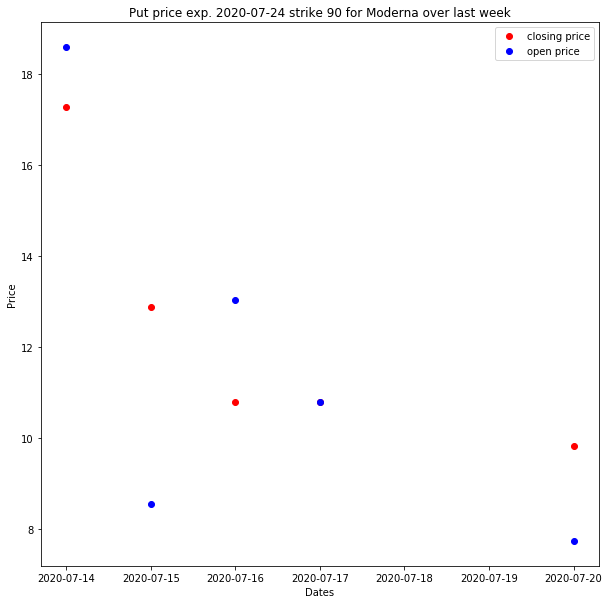

In [104]:
get_option_hist_and_plot(symbol, expirationDate, strike, optionType, interval, span, bounds, info)